# Exploratory Data Analysis of Successful Film Trends
## Informing Decision-making for Microsoft's New Movie Studio

# 1. Business Understanding
Microsoft has identified an opportunity to enter the movie industry by establishing a new movie studio. However, as a technology company, they lack expertise in the domain of filmmaking. To make informed decisions about the type of films to produce, Microsoft needs to understand the current landscape of the movie industry.



The primary objective is to explore successful movies and translate the findings into actionable insights. Through exploratory data analysis, insights of the types of films doing well can be generated.These insights will serve as a foundation for determining the types of films the new studio should create to maximize their chances of achieving box office success.

This analysis aims to answer the following key questions:
* What are the top-performing genres in the movie industry?
* Does runtime of different movies have an impact on their viewers ratings?
* What is the difference in performance between domestic gross and foreign gross for movies at the box office?
* Does the original language of movies have an impact on movie popularity?
* Is there a relationship between production budget and total gross revenue of movies?

# 2. Data Understanding
To gain a comprehensive understanding of the movie industry and address Microsoft's business problem, several types of data can be collected and analyzed. 
The datasets used for this anaysis contains information from movie sites. The files included  are `'tn.movie_budgets.csv'`, `'bom.movie_gross.csv'`, `'tmdb.movies.csv'` and a database called `'im.db'`.
Information contained in these files includes:
+ Genres
+ Movie Titles
+ Movie Ratings
+ Movie Budgets
+ Domestic and Foreign Gross Income
+ Release dates
+ Runtime Minutes
+ Popularity

## Relevance of this information
* We can be able to understand audience preferences by analyzing the performance of different genres which can help determine which genres are currently popular and have a higher likelihood of success.
* Analyzing ratings can help identify films that have been well-received and positively reviewed, suggesting higher chances of success.
* Analyzing the performance of films across different budget ranges can help identify patterns and determine optimal budget allocation strategies for Microsoft's new movie studio.
* Analyzing the performance of films in different markets can inform decisions regarding international distribution strategies and potential revenue streams.
* Analyzing runtime minutes can help identify patterns regarding film duration and potential audience preferences.
* Analyzing popularity metrics can help gauge the potential success and audience reception of movies.


# 3. Data Preparation

We first import the relevant packages for this analysis.

In [1]:
# importing the relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

#enabling plotting of visusalizations in the notebook
%matplotlib inline

## a) Previewing the Database Tables
The database `im.db` has some datasets that will be useful for this analysis.

In [2]:
#creating a database connection
conn = sqlite3.connect('im.db')

#querying the database to view the database tables
q1 = """SELECT name
        FROM sqlite_master
        WHERE type = 'table';
     """
#executing the query using pandas
pd.read_sql(q1,conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


From the result above, we will need only the `movie_basics` and `movie_ratings` table. 
## Loading the two tables
Starting with `movie_basics`

In [3]:
#previewing 'movie_basics' by selecting all columns from the table
q2 = """SELECT * 
        FROM movie_basics;
     """
#executing the query and assigning to variable name movie_basics
movie_basics = pd.read_sql(q2,conn)

#loading the first five rows
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Now `movie_ratings`

In [4]:
#selecting all columns 
q3 = """SELECT *
        FROM movie_ratings;
     """
#executing the query and assigning to variable name movie_ratings
movie_ratings = pd.read_sql(q3,conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Joining the two tables using movie_id to create one table
Both tables have _movie_id_, we join them to form one table with more information.

In [5]:
#query the database to join the tables
# we'll use a LEFT JOIN 
q4 = """SELECT * 
        FROM movie_basics
        LEFT JOIN movie_ratings USING(movie_id);        
     """
#executing the query and assigning to variable name movies_info
movies_info = pd.read_sql(q4,conn)
movies_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [6]:
#checking the info of this table
movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


## b) Loading the csv files
The csv files we'll use are `'tn.movie_budgets.csv'`, `'bom.movie_gross.csv'` and `'tmdb.movies.csv'`.

Previewing `'tn.movie_budgets.csv'` stored under data folder:

In [7]:
#using pandas to read the csv file and assigning it to variable name movie_budgets
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

#loading the first five rows
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
#checking the info about this file
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Next `'bom.movie_gross.csv'`:

In [9]:
#reading and assigning to bom_movies
bom_movies = pd.read_csv('data/bom.movie_gross.csv')
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
#checking the info 
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Finally `'tmdb.movies.csv'`.

In [11]:
#reading and assigning to tmdb_movies
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
#checking the info
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## c) Data Cleaning
Some of the tables may contain duplicates, missing values or incorrect formatting. In this stage, we are going to clean each table to remove these duplicates or missing values present.
To start with, we'll first check for missing values in each table and deal with them.

## i) Identifying and handling missing values

### Missing values in `movies_info` 

In [13]:
#previewing the table again
movies_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [14]:
#checking if missing values are present
#and counting how many they are in each column
movies_info.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

#### Dropping all rows containing missing values

In [15]:
#dropping rows with missing values
movies_info.dropna(inplace = True)

In [16]:
#checking again for missing values
movies_info.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Missing values no longer exist.

In [17]:
#previewing the first 10 rows
movies_info.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451.0
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64.0
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53.0
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120.0
14,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6.0


## Creating a function to check and remove missing values.
To avoid repeating this process too many times with the remaining 3 dataframes, we'll define a function that will check if missing values are present in a dataframe and remove the rows with missing values.

In [18]:
#defining the function
def remove_missing_values(df):
    
    #checking for missing values
    missing_values = df.isnull().sum()
    
    #condition if the sum of missing values is greater than zero
    if missing_values.sum() > 0:
        print('Missing values found.')
        print(missing_values)
        
        #removing rows with missing values
        df = df.dropna(inplace=True)
        
        print('Rows with missing values removed!')
        
    else:
        #output if no missing values are present
        print('No missing values.')
        
    #return the dataframe    
    return df  

In [19]:
#testing our function with the table we removed missing values earlier
remove_missing_values(movies_info)

No missing values.


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0


### We use the function to check and remove missing values in table `movie_budgets`.

In [20]:
#checking and removing missing values
remove_missing_values(movie_budgets)

No missing values.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [21]:
#previewing the info of the table
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Removing missing values in `bom_movies`

In [22]:
#checking and removing missing values in table 'bom_movies'
remove_missing_values(bom_movies)

Missing values found.
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
Rows with missing values removed!


In [23]:
#previewing the info of the table
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


### Removing missing values in `tmdb_movies`

In [24]:
#checking and removing missing values in table 'bom_movies'
remove_missing_values(tmdb_movies)

No missing values.


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
#previewing the info of the table
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## ii) Identifying and handling duplicates
### Duplicates in `movies_info`

In [26]:
#checking for duplicates
movies_info.duplicated().value_counts()

False    65720
dtype: int64

`movies_info` does not appear to have duplicates. We then move to check if duplicates are present in `movies_budget`
### Duplicates in `movie_budget`

In [27]:
#checking for duplicates
movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

`movie_budgets` does not appear to have duplicates. We then move to check if duplicates are present in `bom_movies`
### Duplicates in `bom_movies`

In [28]:
#checking for duplicates
bom_movies.duplicated().value_counts()

False    2007
dtype: int64

`bom_movies` does not appear to have duplicates. We then move to check if duplicates are present in `tmdb_movies`
### Duplicates in `tmdb_movies`

In [29]:
#checking for duplicates
tmdb_movies.duplicated().value_counts()

False    26517
dtype: int64

## iii) Formatting columns in `movie_budgets` and `bom_movies`

The data is now cleaned from having duplicates and missing values. However, the `movie_budgets` table has some of its columns in a format that may hinder our analysis. Here is a preview of the table:

In [30]:
#movie_budgets table
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The columns `'production_budget'`, `'domestic_gross'` and `'worldwide_gross'` have commas and the currency value `$` which will affect our analysis. We then have to clean this and convert it to `type = int`

### Defining a function to remove commas and dollar signs

In [31]:
#the function
def remove_commas_dollar_sign(df, column_names):
    for column_name in column_names:
        # Remove commas and dollar signs from the specified column
        df[column_name] = df[column_name].str.replace(',', '').str.replace('$', '')

        # Convert the column to integer data type
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')

    return df

Applying the function to our table `movie_budgets`.

In [32]:
import warnings

# Ignore warning messages within the context
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    #renaming the table to cleaned_movie_budgets
    cleaned_movie_budgets = remove_commas_dollar_sign(movie_budgets, ['production_budget', 'domestic_gross', 'worldwide_gross'])

In [33]:
#previewing changes
cleaned_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Adding a column named `total_gross`
We'll need to know the total gross of each movie to determine the net profits.

In [34]:
#creating new column
cleaned_movie_budgets['total_grosss'] = cleaned_movie_budgets['domestic_gross'] + cleaned_movie_budgets['worldwide_gross']

In [35]:
#previewing the first 5 rows
cleaned_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_grosss
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


### Converting column type in `bom_movies`
Also, the table `bom_movies` has its column as type `float`. We convert the column to `type = int`.

In [36]:
#previewing the first 3 rows
bom_movies.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


We need to convert column `domestic_gross` and `foreign_gross` to `int` type. 

In [37]:
#converting to type int
bom_movies['domestic_gross'] = bom_movies['domestic_gross'].astype(int)

#previewing the first 3 rows
bom_movies.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010


In [38]:
#converting foreign gross column to float
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(',', '').astype(float)
#converting to int
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].astype(int)

## iv) Filtering columns in `movies_info`, `cleaned_movie_budgets`, `'bom_movies'` and                     `'tmdb_movies'`
>We'll need only the relevant columns from `movies_info` table that will be important in our analysis. The most relevant columns are `'runtime_minutes'`, `'genres'` and `'averagerating'`

In [39]:
#filtering columns in movies_info
relevant_columns = ['genres','averagerating','runtime_minutes']
movies_info = movies_info.loc[:,relevant_columns]

In [40]:
#previewing the first 5 rows
movies_info.head()

,genres,averagerating,runtime_minutes
0,"Action,Crime,Drama",7.0,175.0
1,"Biography,Drama",7.2,114.0
2,Drama,6.9,122.0
4,"Comedy,Drama,Fantasy",6.5,80.0
7,"Adventure,Animation,Comedy",8.1,83.0


> We'll also only need the relevant columns from `cleaned_movie_budgets`. The relevant columns for our analysis are `'movie'`, `'production_budget'` and `'total_grosss'`

In [41]:
#relevant columns
relevant_columns2 = ['movie','production_budget','total_grosss']

#filtering the relevant columns
cleaned_movie_budgets = cleaned_movie_budgets.loc[:,relevant_columns2]

In [42]:
#previewing the first 5 rows
cleaned_movie_budgets.head()

,movie,production_budget,total_grosss
0,Avatar,425000000,3536852904
1,Pirates of the Caribbean: On Stranger Tides,410600000,1286727750
2,Dark Phoenix,350000000,192524700
3,Avengers: Age of Ultron,330600000,1862019831
4,Star Wars Ep. VIII: The Last Jedi,317000000,1936903129


> The relevant columns in `bom_movies` are `'title'`, `'domestic_gross'` and `'foreign_gross'`. Thus we filter them from the table:

In [43]:
relevant_columns3 = ['title','domestic_gross', 'foreign_gross']

#filtering the relevant columns
bom_movies = bom_movies.loc[:,relevant_columns3]

In [44]:
#previewing the first 5 rows
bom_movies.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000,652000000
1,Alice in Wonderland (2010),334200000,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000,664300000
3,Inception,292600000,535700000
4,Shrek Forever After,238700000,513900000


> The relevant columns in `tmdb_movies` are `'original_language'`, `'title'` and `'popularity'`. These columns will help as to compare the popularity of titles against different original languages. Thus we filter them from the table:

In [45]:
relevant_columns4 = ['title','original_language','popularity' ]

#filtering the relevant columns
tmdb_movies = tmdb_movies.loc[:,relevant_columns4]

In [46]:
#previewing the first 5 rows
tmdb_movies.head()

,title,original_language,popularity
0,Harry Potter and the Deathly Hallows: Part 1,en,33.533
1,How to Train Your Dragon,en,28.734
2,Iron Man 2,en,28.515
3,Toy Story,en,28.005
4,Inception,en,27.920


### Done. We've successfully cleaned all tables and now it's time to perform some analysis.

## 4. Exploratory Data Analysis
Here, we will analyze the filtered and cleaned tables in order to come up with conclusions and recommendations for Microsoft's new movie studio.
The aim of this analysis is to answer the following questions:
1. What are the top-performing genres in the movie industry?
2. Does runtime of different movies have an impact on their viewers ratings?
3. What is the difference in performance between domestic gross and foreign gross for movies at the box office?
4. Does the original language of movies have an impact on movie popularity?
5. Is there a relationship between production budget and total gross revenue of movies?

Starting with the first question;

#### 1. What are the top-performing genres in the movie industry?

In [47]:
#exploring first 10 rows in table movies_info
movies_info.head(10)

,genres,averagerating,runtime_minutes
0,"Action,Crime,Drama",7.0,175.0
1,"Biography,Drama",7.2,114.0
2,Drama,6.9,122.0
4,"Comedy,Drama,Fantasy",6.5,80.0
7,"Adventure,Animation,Comedy",8.1,83.0
10,Drama,6.8,136.0
11,History,4.6,100.0
12,Documentary,7.6,180.0
13,Drama,6.9,89.0
14,Documentary,7.5,60.0


For this table, the goal is to compare the ratings of different genres to determine the top-performing ones that Microsoft can focus on for a better chance of success with their new movie studio. A **bar graph** will be best suited for this comparison.

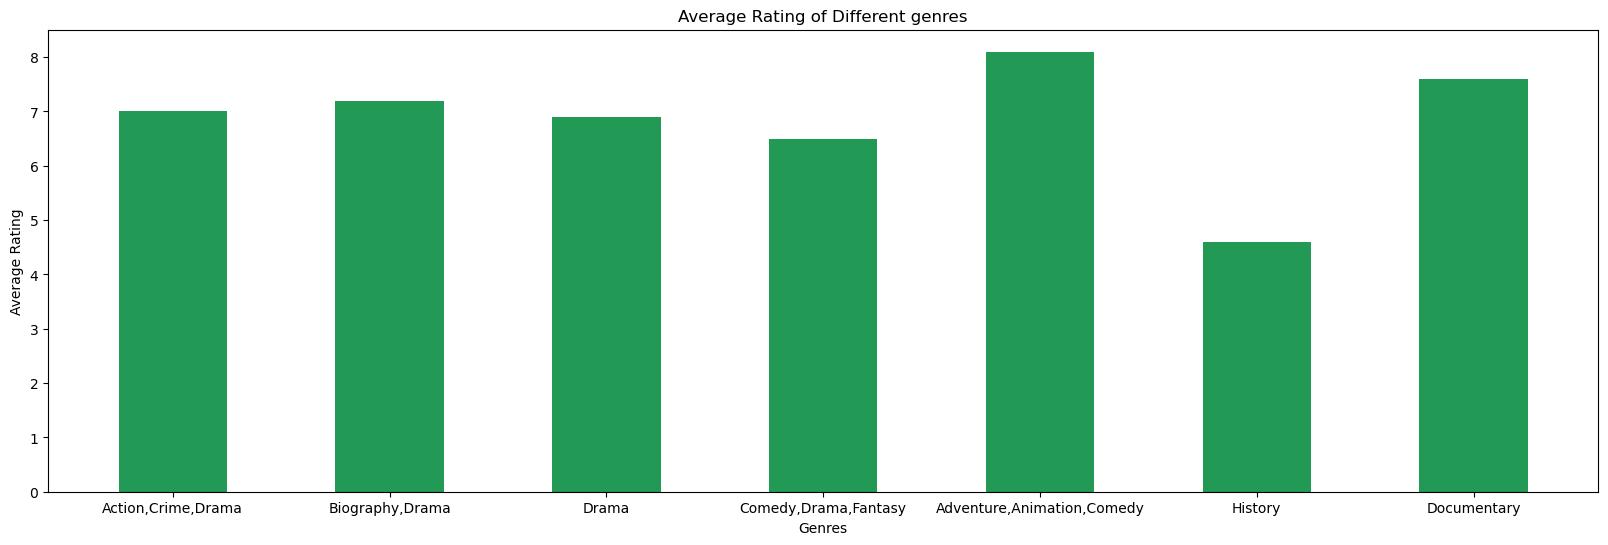

In [48]:
#plotting a bar graph of genres and average ratings
fig, ax = plt.subplots(figsize = (20,6))

#assigning sample table to data
data = movies_info.head(10)

#declaring variables
x = data['genres']
y = data['averagerating']

#plotting
ax.bar(x,y, color = '#229954', width = 0.5)
       

#labelling axes and title
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating of Different genres');

From the bar graph above dor our sample data, it is clear that the best performing genre is a combination of `Adventure`, `Animation` and `Comedy` and the least performing genre is `History`. 
However, the difference in average ratings is not that high with the other ratings. If Microsoft opens a new studio, they should put more focus on the best performing genres from the graph.

#### 2. Does runtime of different movies have an impact on their viewers ratings?
To do this, we first sort the data in the table from the highest runtime minutes to get the best results.

In [49]:
#sorting the first 10 rows in table movies_info by runtime_minutes
movies_info.head(10).sort_values(by='runtime_minutes', ascending = False).head(10)

,genres,averagerating,runtime_minutes
12,Documentary,7.6,180.0
0,"Action,Crime,Drama",7.0,175.0
10,Drama,6.8,136.0
2,Drama,6.9,122.0
1,"Biography,Drama",7.2,114.0
11,History,4.6,100.0
13,Drama,6.9,89.0
7,"Adventure,Animation,Comedy",8.1,83.0
4,"Comedy,Drama,Fantasy",6.5,80.0
14,Documentary,7.5,60.0


Plotting a `line graph` will be best for this.

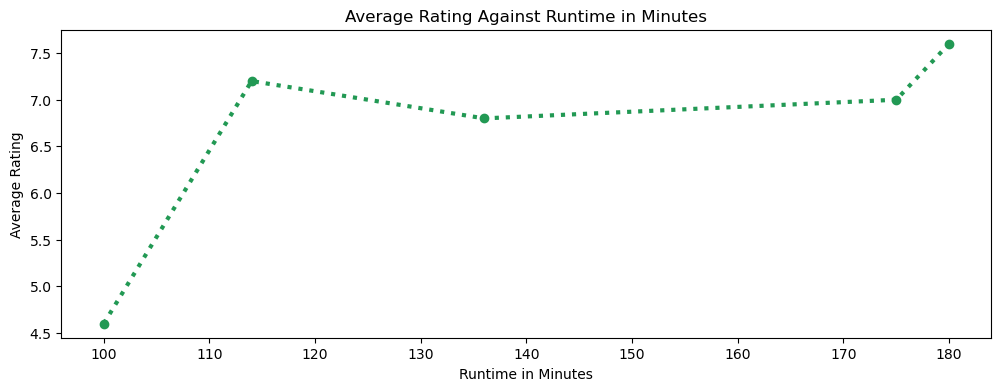

In [93]:
#plotting a line graph
fig, ax = plt.subplots(figsize = (12,4))

#decalaring sorted values to data2
data2 = movies_info.head(10).sort_values(by='runtime_minutes', ascending = False)
#dropping duplicate genre values
data3 = data2.drop_duplicates(subset='genres').head()

#declaring x and y axis
x = data3['runtime_minutes']
y = data3['averagerating']

#labelling axis and title
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating Against Runtime in Minutes')

#plotting
ax.plot(x,y, color = '#229954', ls=':', lw = 3, marker = 'o');


From the line graph above, the `average rating` is highest when the `runtime minutes` is also highest and it's also low when the `runtime minutes` are low. Hence, Microsoft should create movies with longer runtime minutes for a better chance at success.

#### 3. What is the difference in performance between domestic gross and foreign gross for movies at the box office?